__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/pandasklar/blob/master/jupyter/12_Review_and_Visualize.ipynb)__

# Review and visualize
Review and visualize data that meets your criteria. <br>
This notebook raises errors for demonstration purpose.
* `plot`: Easier plot
* `check_mask`: Count rows filtered by a binary mask. Raises an error, if the number is unexpected.
* `specials`: Returns rows representing all special values per column.
* `sample`: Returns some sample rows: beginning + end + specials + random rows.
* `search_str`: Searches all str columns of a dataframe. Useful for development and debugging.
* `grid`: Visualize with dtale.
* `memory_consumption`: Returns the memory consumption of Python objects.

In [1]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['dropbox_path'] = /home/me/Data_Linux/Dropbox
environment['lib_path']     = /home/me/Data_Linux/Dropbox/31_Projekte/01_Python/libs
Start Time: 22:48:17


time: 375 ms


In [2]:
import numpy      as np
import pandas     as pd 
#import bpyth      as bpy

# pandasklar
try:
    import pandasklar as pak 
except ImportError as e:
    !pip install pandasklar
    import pandasklar as pak   
    
# verbose
pak.Config.set('VERBOSE', True)

grid = pak.grid

VERBOSE = True
--> setting verbose=True as default for all pandasklar functions

time: 1.42 s


## plot(): Easier plot

In [3]:
blab.help(pak.plot)

<span style="font-size:larger;">plot(data, x=None, secondary_y=False, ylabel=None, subplots=False, figsize=None, inaccurate_limit=10000, **kwargs):</span>

Plots data. All parameters are passed to pandas.DataFrame.plot, but 
* data:             The data to plot. DataFrame, or list of Series, or any other data 
                    which can be converted to DataFrame by the pandasklar dataframe function.
                    Non-numeric columns are ignored (even for column positions). 
* x:                Which column to be used as x-axis. Column name or column position.
                    x=None -> The index is used as x.   
* secondary_y:      Which columns to plot on the secondary y-axis. 
                    Column name, column position or list of column names.
* figsize:          Size of a figure object. Default is (16,3) or (16,4), depending on the data.
* inaccurate_limit: From what size should the data be thinned randomly.
                    Uses pandasklars sample function, so minimums and maximums are kept.     

time: 34.6 ms


In [4]:
# Several types of random numbers, with parameters
size = 100
a = pak.random_series( size, 'ascending'                    )
b = pak.random_series( size, 'ascending'                    )
c = pak.random_series( size, 'descending'                   )
d = pak.random_series( size, 'descending'                   )
e = pak.random_series( size, 'perlin',     freq=2           )
f = pak.random_series( size, 'perlin',     freq=[16,1,8,1]  )
g = pak.random_series( size, 'perlin',     freq=[4,1,8,128] )

df = pak.dataframe( (a,b,c,d,e,f,g), verbose=False )
pak.sample(df)

,A,B,C,D,E,F,G
0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
32,0.375178,0.258461,0.876060,0.399516,0.856328,-0.099293,0.340932
61,0.436575,0.375498,0.471113,0.071900,-0.535243,-0.624693,1.000000
74,0.589512,0.501727,0.270542,0.065675,-1.000000,-0.434243,0.232805
84,0.684056,0.692456,0.153754,0.054401,-0.717108,0.601643,-0.232669
89,0.840410,0.826786,0.129995,0.037349,-0.455870,-0.008152,-0.350431
97,0.988164,0.989392,0.012542,0.001913,-0.096608,-1.000000,-0.070501
99,1.000000,1.000000,0.000000,0.000000,-0.030933,-0.374591,-0.018577


time: 229 ms


<AxesSubplot: >

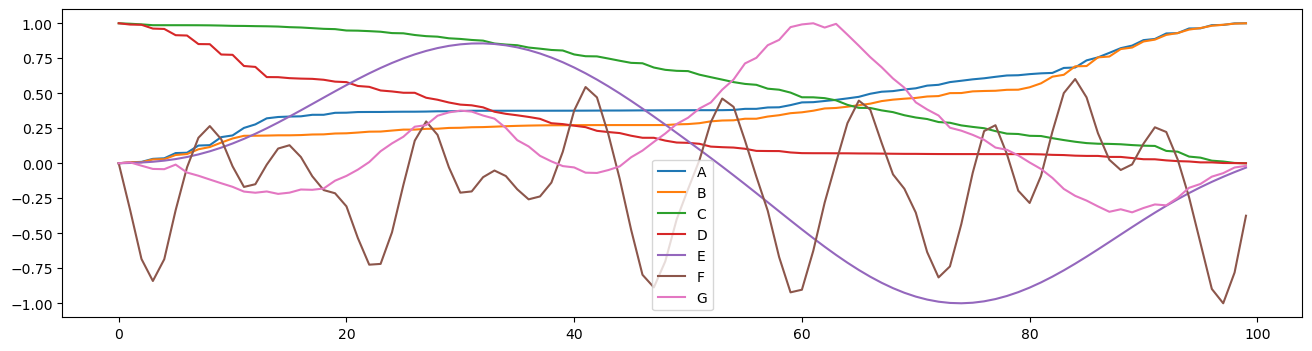

time: 400 ms


In [5]:
# just plot all together
%matplotlib inline
pak.plot(df)

<AxesSubplot: xlabel='G'>

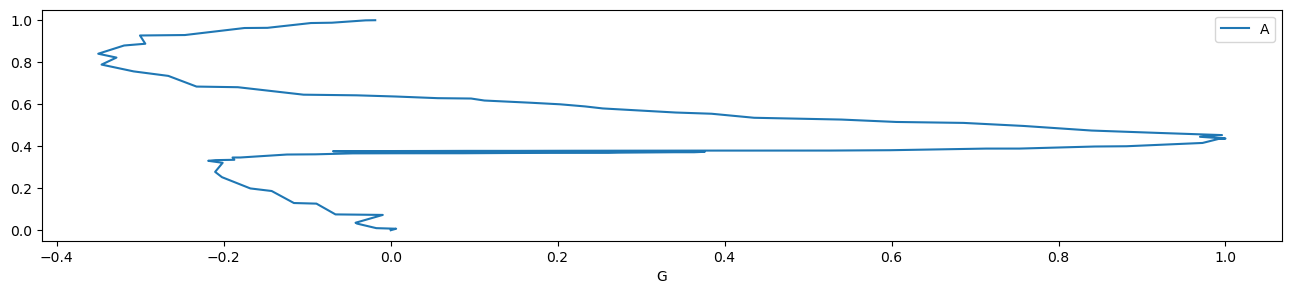

time: 331 ms


In [6]:
# plot 2 Series, use different y-axis
%matplotlib inline
pak.plot(df.A, df.G)

<AxesSubplot: >

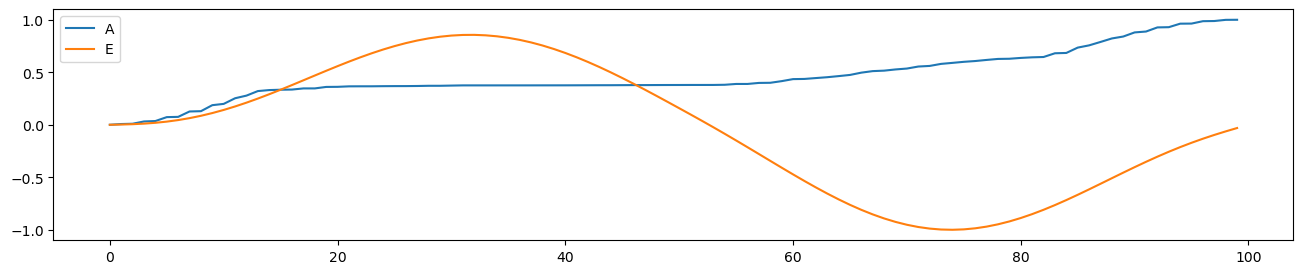

time: 379 ms


In [7]:
# plot E (Perlin) and A (ascending)
%matplotlib inline 
pak.plot(df[list('AE')])

<AxesSubplot: xlabel='A'>

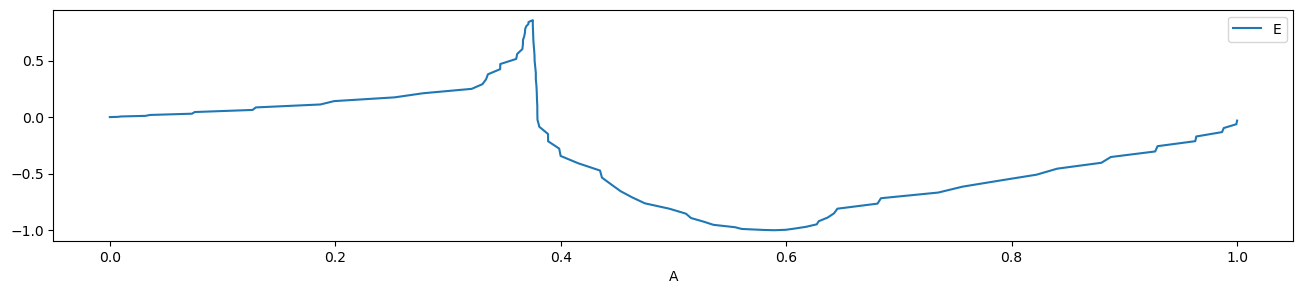

time: 289 ms


In [8]:
# plot E using A as x-Axis
%matplotlib inline 
pak.plot(df[list('AE')], x='A')

## specials(): Rows representing all special values per column

In [9]:
?pak.specials

time: 84.1 ms


Signature:
pak.specials(
    df,
    find=['head', 'first', 'min', 'most', 'max', 'nan', 'last', 'tail'],
    indicator=None,
    sort='index',
)
Docstring:
Returns rows representing all special values per column.
The resulting dataframe has the same minimums and maximums per column as the input dataframe, 
and if a column in the input contains NaNs the result will contain NaNs as well.
* find: List of what values are searched. 
  Possible values: 'head','first','min','most','max','nan','last','tail'
* indicator: Show additional column with a note, why the row is in the result
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/subsets.py
Type:      function


In [10]:
# create test data

size = 10000 #00
df6 = pak.people(size)
df5 = df6.head(int(size/10))
df4 = df6.head(int(size/100))
df3 = df6.head(int(size/1000))

time: 1.09 s


In [11]:
a = pak.specials(df6, indicator='n')
a

,first_name,age,age_class,postal_code,birthplace,secret,features,history,n
0,Rudolph,37,30,24092,Berlin,suuADK,"{W, 0, L, I}","[b, b, a, b]",head secret_first postal_code_first first_name...
25,Erich,20,20,46273,<NA>,oEäPycB3uM,"{E, d, J, X}","[A, A, A]",age_min age_class_min age_class_last birthplac...
28,Detlef,39,30,64269,<NA>,uyEBKÄ,"{U, R, y, 2}",[],first_name_most age_class_first age_class_most...
34,Maike,33,30,<NA>,Bremen,cmÖmH7,"{B, R, s}","[A, C, C, B]",postal_code_nan age_class_first age_class_most...
57,Moritz,31,30,99994,Berlin,o35F4,"{b, F, U, L}","[A, C, C, B]",postal_code_max age_most age_class_first age_c...
109,Niclas,42,40,85277,<NA>,Jiss4qf,"{h, k, y, X}","[c, b, a]",age_max age_class_max birthplace_nan
189,Zoe,34,30,28634,Berlin,MCNA6N5öq2,"{h, q, f, a}","[a, b, c]",first_name_max age_class_first age_class_most ...
292,Adolf,29,20,37722,Bremen,ha5ziPUäOU,"{B, q}","[A, B, C]",first_name_min age_class_min age_class_last bi...
2080,Neele,32,30,13629,Berlin,AEu3Gj,"{b, m}","[A, B, C]",features_most
2568,Josephine,38,30,10035,Berlin,0HMDGOj,"{F, C, Q, M}","[c, b, a]",postal_code_min age_class_first age_class_most...


time: 294 ms


## sample(): Returns some sample rows

In [12]:
?pak.sample

time: 29.7 ms


Signature: pak.sample(df, size=None)
Docstring:
Returns some sample rows.
Always the beginning and the end, 
plus the other specials() --see there--,
plus some random rows.
* size: Number of rows to return. If size=None, all specials() are returned.
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/subsets.py
Type:      function


In [13]:
# create test data

size = 10000 #00
df6 = pak.people(size)
df5 = df6.head(int(size/10))
df4 = df6.head(int(size/100))
df3 = df6.head(int(size/1000))
df = df4

time: 960 ms


In [14]:
pak.sample(df6,15)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Noah,32,30,20251,<NA>,V1DquUxT,"{T, K, X, z}","[a, b, c]"
11,Willi,29,20,<NA>,Bremen,WGT7Ä,"{O, G, r, s}","[a, b, c]"
50,Denis,42,40,60880,<NA>,0wsöA1jkÄ,"{c, E, 4}","[c, b, a]"
54,Zoe,37,30,22948,Bremen,SlH3snOg,"{2, q, a, I}","[A, B, C]"
102,Ingeborg,20,20,23891,<NA>,DwS59g,"{r, S, y, X, t}","[b, b, a, b]"
160,Adolf,32,30,18489,Berlin,goimC1äDQD,"{H, i, q, h}","[A, B, C, C]"
326,Frieda,40,40,39922,<NA>,tOkaiÄZLäS,"{z, Q, 2, S, h}","[c, b, a]"
404,Detlef,31,30,99979,Bremen,ü0iUjB3F,"{b, 5, R, W}","[A, B, C]"
1273,Anton,38,30,10000,Bremen,aFHä3jU,"{h, A, S}","[A, B, C, C]"
1683,Marina,28,20,56824,Berlin,üüaD4IH,"{R, L, P, O, k}","[c, b, a]"


time: 289 ms


In [15]:
pak.sample(df3,1005)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Noah,32,30,20251,<NA>,V1DquUxT,"{T, K, X, z}","[a, b, c]"
1,Karin,26,20,31953,Bremen,3RohyÖJäf,"{V, B, K, m}","[A, x]"
2,Finn,34,30,95813,Berlin,uqdgJhseJ,"{M, T, Y, L}","[b, b, a, b]"
3,Hildegard,31,30,68816,Bremen,S4x6QVdzöN,"{k, 0, e, g}","[A, C, C, B]"
4,Sandra,31,30,49242,Bremen,1e1cLSRa,"{C, j, 0}","[c, b, a]"
5,Thorsten,27,20,94505,Berlin,jäjjXnm,"{U, G, O, y, E}","[A, B, C]"
6,Louise,34,30,31005,<NA>,us30d,"{i, q}",[]
7,Anke,33,30,88351,Berlin,v0PÖDYj,"{H, u}","[A, A, A]"
8,Sascha,35,30,50897,Bremen,VJpuK2aäÖw,"{j, T, o, U}","[A, B, C, C]"
9,Christiane,30,30,92675,Berlin,hSBtuuÜYWi,"{Z, g}","[A, A, A]"


time: 56 ms


## search_str(): Searches all str columns of a dataframe

In [16]:
?pak.search_str

time: 31.4 ms


Signature: pak.search_str(df, find, without=[])
Docstring:
Searches all str columns of a dataframe.
Useful for development and debugging.
* find:    What is to be found?                  String or list of strings.
* without: Which columns should not be searched? String or list of strings.    
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [17]:
# create mask: most frequent first_name
find = ['Hamburg', pak.most_freq_elt(df.first_name)]
print('search for',find)

search for ['Hamburg', 'Alexander']
time: 39.9 ms


In [18]:
pak.search_str(df, find)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
34,Alexander,35,30,19892,<NA>,tlzuPT,"{c, M, N, G}","[b, b, a, b]"


time: 79.3 ms


## check_mask(): Count rows filtered by a binary mask

In [19]:
?pak.check_mask

time: 30.4 ms


Signature:
pak.check_mask(
    df,
    mask,
    expectation_min=None,
    expectation_max=None,
    msg='',
    stop=True,
    verbose=None,
)
Docstring:
Count rows filtered by a binary mask.
Raises an error, if the number is unexpected.

Examples:
check_mask( df, mask )         # just show the number of rows   
check_mask( df, mask, 2000 )   # checks for about 2000 rows (if not 0: not more than double, not less than half)
check_mask( df, mask, 0 )      # checks for exactly 0 rows    
check_mask( df, mask, 10, 50)  # checks for 10..50 rows

Example with later raise:
error = check_mask(df, mask, 214, stop=False)        
grid(df, mask, error)        
bpy.raise_if(error)
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [20]:
# define mask
mask = (df.age >= 30)  &  (df.age < 40) 
#df[mask]

time: 55.7 ms


In [21]:
# just show the number of rows
pak.check_mask(df, mask)

check_mask:  63 rows
time: 35.6 ms


In [22]:
# checks for about 50 rows
pak.check_mask(df, mask, 50)

check_mask:  63 rows
time: 32.2 ms


In [23]:
# checks for about 50 rows
pak.check_mask(df, mask, 50, verbose=True)

check_mask:  63 rows
time: 35.4 ms


In [24]:
# checks for 0..100 rows
pak.check_mask(df, mask, 0, 100)

check_mask:  63 rows
time: 35.8 ms


## grid(): Visualize with dtale

In [25]:
?grid

time: 46.5 ms


Signature: grid(df, mask=None, error='€€€', color='blue', **kwargs)
Docstring:
Visualization of a DataFrame using dtale.
* df:     DataFrame to show
* mask:   Binary mask, function or Searchstring to reduce the number of rows
* error:  Error message
* color:  Color of the error message.
* kwargs: Options for dtale. See https://github.com/man-group/dtale#instance-settings
          Caution: This will affect all grids in this notebook...
dtale may not work in a multiscreen setting on windows.

=== Examples ===
grid(df)                        # show all rows
grid(df,mask)                   # show with binary mask    
grid(df,sample)                 # show with functionally mask

=== For error indication after check_mask ===
error = check_mask(df, mask, 900, stop=False)
grid(df, mask, error) 
and later: raise_if(error)
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [26]:
# show
grid(df)

100 rows


time: 214 ms


### grid(): Use mask

In [27]:
# Function as mask
grid(df, pak.sample)

11 rows out of 100


time: 406 ms


In [28]:
# Binary mask
mask = df.age > 25
grid(df, mask)

91 rows out of 100


time: 168 ms


### grid() options
Some grid options are global, e.g. max_column_width. If you set this option to a value later in your notebook, all grids in the notebook are rendered with this column_width. If you find a way to change this, send me a message.

In [29]:
# global Settings
pak.set_grid(max_column_width=200)

time: 32.8 ms


In [30]:
# show 
grid(df)

100 rows


time: 149 ms


### grid(): Advanced Formating
See options on https://github.com/man-group/dtale#instance-settings

In [31]:
mask = df.age > 25
grid(df, mask, sort=[('first_name','ASC')], background_mode='heatmap-col-age')
#grid(df, mask, drop_index=True,)

91 rows out of 100


time: 147 ms


### grid(): Special cases

In [32]:
# No DataFrame
grid(None)

Nothing to show
time: 44.9 ms


In [33]:
# Empty DataFrame
d = pd.DataFrame()
grid(d)

No rows
time: 43.1 ms


In [34]:
# 100% filtered 
mask = df.age > 1000
grid(df,mask)

No rows, mask filters them all away
time: 34.9 ms


In [35]:
# 100% filtered, and this is good
mask = df.age > 1000
grid(df,mask, color='green')

No rows, mask filters them all away
time: 40 ms


In [36]:
# 100% filtered, and this is bad
mask = df.age > 1000
grid(df,mask, color='red')

No rows, mask filters them all away
time: 34.1 ms


### grid() & check_mask(): Show error rows and raise later

In [37]:
# define a mask that contains errors
# say our error is df.birthplace == 'Hamburg',
# we don't want that to happen,
# but if it happens we would like to see the rows
mask = df.birthplace == 'Hamburg'
pak.check_mask(df,mask)

check_mask:  0 rows
time: 39 ms


In [38]:
# checking for 0 raises an error, as we want.
# But we don't see the rows affected
pak.check_mask(df,mask, 0)

check_mask:  0 rows
time: 38 ms


In [39]:
# so we use this to show the error rows first
error = pak.check_mask(df,mask, 0, stop=False)
grid(df, mask, error) 

check_mask:  0 rows
No rows, mask filters them all away
time: 38.1 ms


In [40]:
# and raise later
bpy.raise_if(error)

time: 39.7 ms


## memory_consumption

In [41]:
?pak.memory_consumption

time: 32.3 ms


Signature: pak.memory_consumption(iteration_of_objects, limit=10, use_rtype=True)
Docstring:
Returns the memory consumption of Python objects.
* iteration_of_objects: can be e.g. a DataFrame or just locals()
* limit: Limits the output size
* use_rtype: Use rtype instead of type?

For the memory consumption of the biggest 10 local variables call:
bpy.memory_consumption( locals() )
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/analyse.py
Type:      function


In [42]:
# All local variables
r = pak.memory_consumption( locals() )
r

,name,rtype,size
0,df6,"(DataFrame, Series)",5.7 MB
1,df5,"(DataFrame, Series)",585.2 KB
2,df,"(DataFrame, Series)",58.1 KB
3,df4,"(DataFrame, Series)",58.1 KB
4,_14,"(DataFrame, Series)",8.9 KB
5,a,"(DataFrame, Series)",8.7 KB
6,_11,"(DataFrame, Series)",8.7 KB
7,df3,"(DataFrame, Series)",5.5 KB
8,_15,"(DataFrame, Series)",5.5 KB
9,Stop,"(type,)",1.0 KB


time: 76.6 ms


In [43]:
# If you give a DataFrame, it will return the column sizes
pak.memory_consumption( df )

,name,rtype,size
0,features,"(Series, set, str)",30.5 KB
1,secret,"(Series, str)",8.4 KB
2,history,"(Series, list, str)",7.1 KB
3,first_name,"(Series, str)",6.3 KB
4,birthplace,"(Series, NAType)",5.5 KB
5,postal_code,"(Series, int32)",644.0 B
6,age,"(Series, int8)",344.0 B
7,age_class,"(Series, int8)",344.0 B


time: 37.8 ms
